In [1]:
## 필요한 라이브러리, 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from tqdm import tqdm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
## iris 데이터 가져와서 사용
iris = load_iris()
df = pd.DataFrame(np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['label'])

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
## 데이터를 학습 데이터, 테스트 데이터, 검증 데이터로 분할
x = df[iris['feature_names']]
y = df['label']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.33, random_state=42)

In [5]:
def knn_predict(data,X,y,k=1):
    distances = []
    for val in X:
        distance = np.linalg.norm(data-val)
        distances.append(distance)

    distances = np.array(distances)
    if k < len(distances):
        idx = np.argpartition(distances,k)
        prediction = Counter(y[idx[:k]]).most_common()[0][0]
    else:
        prediction = Counter(y).most_common()[0][0]
    return prediction

100%|██████████| 79/79 [00:00<00:00, 81.01it/s]


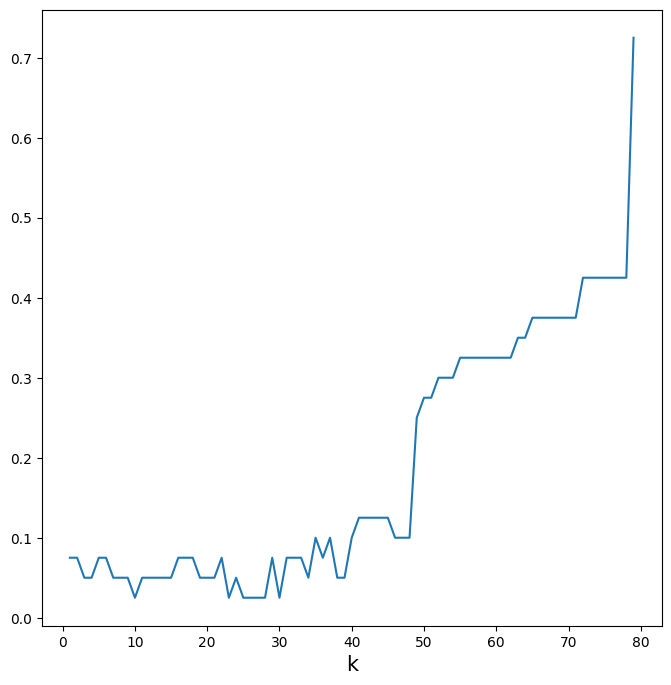

In [6]:
## 검증 데이터를 토대로, 최적의 k 찾기
knn_val_error = []
ks = range(1,len(train_x))
for k in tqdm(ks):
    predict = []
    for j in range(len(val_x)):
        data = val_x.values[j]
        data = np.array(data)
        predict.append(knn_predict(data,train_x.values,train_y.values,k))

    predict = np.array(predict)
    ktre = 1 - (val_y == predict).mean()
    knn_val_error.append(ktre)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

plt.plot(ks, knn_val_error)
plt.xlabel('k',fontsize=15)
plt.show()

In [7]:
min_val_error = min(knn_val_error)
opt_k = knn_val_error.index(min_val_error)+1 ## optimal k

In [8]:
print(opt_k)

10


In [9]:
## 최적 k를 토대로 테스트 데이터를 이용해서 모형을 평가
k = opt_k
knn_test_error = []

predict = []
for j in range(len(test_x)):
    data = test_x.values[j]
    data = np.array(data)
    predict.append(knn_predict(data,train_x.values,train_y.values,k))

predict = np.array(predict)
kte = 1-(test_y == predict).mean()

In [10]:
## 모형 평가 결과, 에러율 0
print(kte)

0.0


In [11]:
## scikit learn 라이브러리 이용하기
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=opt_k)
neigh.fit(train_x.values, train_y.values)

knn_test_error = []

predict = []
for j in range(len(test_x)):
    data = test_x.values[j]
    data = np.array(data)
    data = np.expand_dims(data, axis=0)
    predict.append(neigh.predict(data))

predict = np.squeeze(predict)
kte = 1-(test_y == predict).mean()

In [12]:
## 다시 모형 평가 결과, 에러율 0
print(kte)

0.0
